In [1]:
from netCDF4 import Dataset
import matplotlib.pyplot as plt
import cartopy.crs as crs
from matplotlib.cm import get_cmap
from wrf import (getvar, latlon_coords, get_cartopy, to_np, smooth2d, cartopy_xlim, cartopy_ylim, ALL_TIMES, ll_to_xy)
from cartopy.feature import NaturalEarthFeature
from __future__ import print_function
import cartopy.io.img_tiles as cimgt
from wrf import omp_set_num_threads, omp_get_max_threads

omp_set_num_threads(10)

In [2]:
ncfile = Dataset("Descargas/wrfout-20210322.nc")

nombres = ["Hermosillo", "Obregon", "Nogales", "Caborca", "Culiacan", "Los Mochis", "Mazatlan", "Santa Ana", "Navojoa", "Ciudad Juarez", "Chihuahua"]
lat = [29.1025, 27.486389, 31.318611, 30.717222, 24.808611, 25.793611, 23.241389, 30.5406, 27.080833, 31.739444, 28.635278]
lon = [-110.977222, -109.940833, -110.945833, -112.148889, -107.393611, -108.996944, -106.409722, -111.1205, -109.445278, -106.486944, -106.08889]
    

In [3]:
def agua_precipitable(tiempo):
    pw = getvar(ncfile, "pw", timeidx=tiempo)

    lats, lons = latlon_coords(pw)
    cart_proj = get_cartopy(pw)
    fig = plt.figure(figsize=(12,12))
    ax = plt.axes(projection=cart_proj)
    states = NaturalEarthFeature(category="cultural", 
                                scale="10m", 
                                facecolor="none", 
                                name="admin_1_states_provinces_shp")
    ax.add_feature(states, linewidth=.5, edgecolor="black")
    ax.coastlines('10m', linewidth=0.8)

    cmap=get_cmap("terrain")
    rcmap=cmap.reversed()
    plt.contourf(to_np(lons), to_np(lats), to_np(pw), 50,
                 transform=crs.PlateCarree(),
                 cmap=rcmap,
                 levels=range(0, 50, 1)),
        
    plt.colorbar(ax=ax, shrink=0.71, orientation='horizontal', pad=0.025)
    
    ax.set_xlim(cartopy_xlim(pw))
    ax.set_ylim(cartopy_ylim(pw))
    
    x_y = ll_to_xy(ncfile, lat, lon, meta=False)
    for point in range(len(nombres)):
        rs = int(getvar(ncfile, "pw", timeidx=tiempo, meta=False)[x_y[1][point], x_y[0][point]])
        ax.text(lon[point], lat[point], nombres[point] + "\n" + str(rs), 
                transform=crs.PlateCarree(), 
                fontsize=8, 
                family="sans", 
                weight="normal")

    plt.title("Agua Precipitable (mm)")
    plt.show()
#     filename = str(tiempo) + "asdfadsfasdfasdfasdf.png"
#     plt.savefig(filename)
    plt.close(fig)



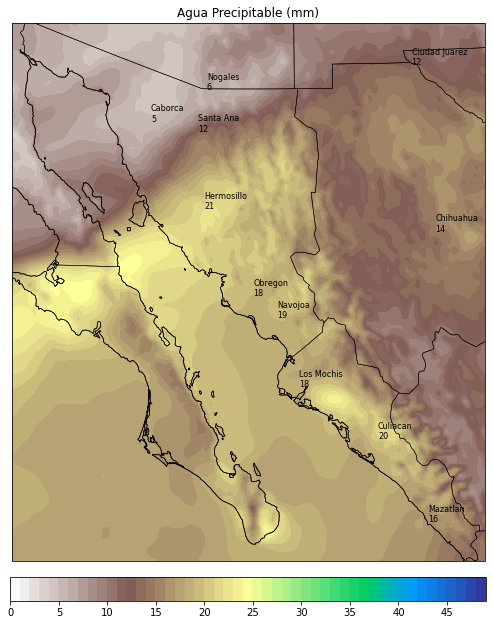

In [4]:
for i in range(1):
     agua_precipitable(i)
#plot_pw(1)